- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks.

File name - Case1_B_glm_rw_restart2.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)

In [1]:
import sys
sys.path.insert(0,'../pestools')

In [2]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model_final


In [3]:
import pestools

In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
import warnings
warnings.filterwarnings('ignore')

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [7]:
directory_name = 'Case5_III_C_glm_rw.demo'
cf_name = 'Case5_III_C_glm_cf_v1_rw' # Control file name

#### b. Parameter Sensitivity 

In [8]:
sen_iteration = pd.read_csv(f'{directory_name}/{cf_name}.isen')
sen_iteration.index = sen_iteration['iteration']
sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
sen_iteration

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,perm_p,perm_m,den_p,den_m,albedo_bg,e_bg,pen_w,pen_s,z_bg,z_s
iteration,,,,,,,,,,,,,,,,,,,,,
1,0.000124,0.000583,0.000007,0.000001,0.000060,0.000052,0.000006,0.000004,0.000002,0.000001,...,17133.10,437909,4.140610e-10,9.894290e-10,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000064
2,0.000279,0.000341,0.000007,0.000001,0.000061,0.000052,0.000006,0.000004,0.000003,0.000001,...,28145.70,357973,8.992190e-10,1.242620e-09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000088
3,0.000118,0.000295,0.000010,0.000001,0.000060,0.000052,0.000007,0.000004,0.000002,0.000002,...,5103.63,460895,4.062990e-10,1.032070e-09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000066
4,0.000114,0.000188,0.000011,0.000001,0.000060,0.000052,0.000007,0.000004,0.000002,0.000003,...,3177.99,219506,3.563210e-10,1.016900e-09,6.111280e-08,4.481600e-08,0.000003,0.000002,8.403000e-07,0.000135


In [9]:
len(sen_iteration.columns.values)

26

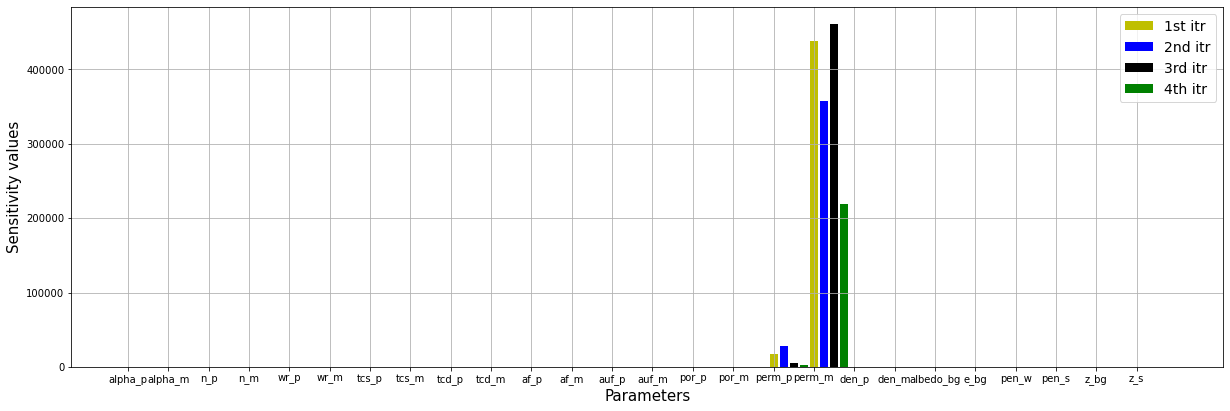

In [10]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(26) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, sen_iteration.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, sen_iteration.iloc[1,:], color='b', label='2nd itr', width=0.2)
ax.bar(X + 0.5, sen_iteration.iloc[2,:], color='k', label='3rd itr', width=0.2)
ax.bar(X + 0.75, sen_iteration.iloc[3,:], color='g', label='4th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

##### Relative sensitivity values

In [11]:
sen_iteration.iloc[0,:].max()

437909.0

In [12]:
relative_set_itr = sen_iteration.copy()
for i, value in enumerate(sen_iteration.index):
    relative_set_itr.iloc[i,:] = relative_set_itr.iloc[0,:]/relative_set_itr.iloc[0,:].max()

relative_set_itr

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,perm_p,perm_m,den_p,den_m,albedo_bg,e_bg,pen_w,pen_s,z_bg,z_s
iteration,,,,,,,,,,,,,,,,,,,,,
1,2.835178e-10,1.331528e-09,1.646997e-11,2.700219e-12,1.379896e-10,1.176587e-10,1.334846e-11,8.521245e-12,3.896837e-12,2.622440e-12,...,0.039125,1,9.455412e-16,2.259440e-15,0.0,0.0,0.0,0.0,0.0,1.459180e-10
2,2.835178e-10,1.331528e-09,1.646997e-11,2.700219e-12,1.379896e-10,1.176587e-10,1.334846e-11,8.521245e-12,3.896837e-12,2.622440e-12,...,0.039125,1,9.455412e-16,2.259440e-15,0.0,0.0,0.0,0.0,0.0,1.459180e-10
3,2.835178e-10,1.331528e-09,1.646997e-11,2.700219e-12,1.379896e-10,1.176587e-10,1.334846e-11,8.521245e-12,3.896837e-12,2.622440e-12,...,0.039125,1,9.455412e-16,2.259440e-15,0.0,0.0,0.0,0.0,0.0,1.459180e-10
4,2.835178e-10,1.331528e-09,1.646997e-11,2.700219e-12,1.379896e-10,1.176587e-10,1.334846e-11,8.521245e-12,3.896837e-12,2.622440e-12,...,0.039125,1,9.455412e-16,2.259440e-15,0.0,0.0,0.0,0.0,0.0,1.459180e-10


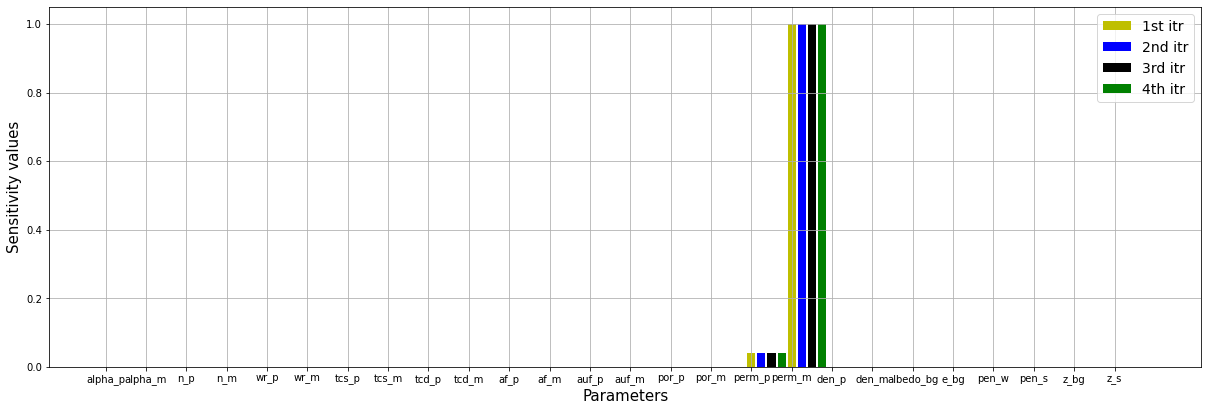

In [13]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(26) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, relative_set_itr.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, relative_set_itr.iloc[1,:], color='b', label='2nd itr', width=0.2)
ax.bar(X + 0.5, relative_set_itr.iloc[2,:], color='k', label='3rd itr', width=0.2)
ax.bar(X + 0.75, relative_set_itr.iloc[3,:], color='g', label='4th itr', width=0.2)



#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

Comments:
    * The sensitivity of the parameters also depends on the lower and upper bounds - If the upper and lower bounds are provided with varying degree of change with respect to the initial value, then the parameter might also have a greater sensitivity. 
    * Next time - Fix the lower and upper bounds and check how the results change! - Try with the new parameter values! - Also add latent heat

### Plotting the change in parameters:


In [14]:
par_iteration = pd.read_csv(f'{directory_name}/{cf_name}.ipar')
par_iteration.index = par_iteration['iteration']
par_iteration.drop(axis=1, columns=['iteration'], inplace=True)
par_iteration

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,perm_p,perm_m,den_p,den_m,albedo_bg,e_bg,pen_w,pen_s,z_bg,z_s
iteration,,,,,,,,,,,,,,,,,,,,,
0,0.010000,0.001825,1.50000,2.05000,0.100000,0.159488,0.439577,0.952105,0.101023,0.984405,...,5.346620e-11,1.000000e-13,900,1900,0.55,0.75,0.010000,0.020000,0.040000,0.005000
1,0.008821,0.002341,1.49967,2.05000,0.104270,0.160644,0.439935,0.952038,0.101072,0.984440,...,3.722880e-11,1.750000e-13,900,1900,0.55,0.75,0.010000,0.020000,0.040000,0.007094
2,0.007997,0.003194,1.49948,2.05001,0.108514,0.161773,0.440198,0.952006,0.101046,0.984468,...,2.998780e-11,1.750000e-13,900,1900,0.55,0.75,0.010000,0.020000,0.040000,0.007495
3,0.006863,0.003194,1.49911,2.05005,0.110930,0.162494,0.440343,0.951975,0.101064,0.984450,...,1.873020e-11,1.750000e-13,900,1900,0.55,0.75,0.010000,0.020000,0.040000,0.008750
4,0.006570,0.003194,1.49894,2.05006,0.111749,0.162741,0.440429,0.951961,0.101077,0.984440,...,2.798930e-11,2.500000e-14,900,1900,0.55,0.75,0.010013,0.020007,0.040003,0.008750


##### Changing the parameters relative to the initial value
- To ensure that we can plot the changes with respect to the parameters, we subtract the parameter values w.r.t the initial values and then multiply by 100.
\begin{equation}
    par_{change} = \frac{(par_{final} - par_{initial})}{par_{initial}} * 100
\end{equation}

In [15]:
par_change = par_iteration.copy()
#pargp_initial = par_change.iloc[0,:]
for i, index_value in enumerate(par_change.index):
    for j, col_value in enumerate(par_change.columns):
        #print(i, j)
        #print(par_change.iloc[i,j])
        par_change.iloc[i,j] = (par_iteration.iloc[i,j] - par_iteration.iloc[0,j])/par_iteration.iloc[0,j]*100
#np.abs(par_change)
par_change

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,perm_p,perm_m,den_p,den_m,albedo_bg,e_bg,pen_w,pen_s,z_bg,z_s
iteration,,,,,,,,,,,,,,,,,,,,,
0,0.0000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0,0,0.0,0.0,0.000,0.000,0.00000,0.0000
1,-11.7852,28.264408,-0.022000,0.000000,4.270,0.724819,0.081442,-0.007037,0.048504,0.003555,...,-30.369467,75.0,0,0,0.0,0.0,0.000,0.000,0.00000,41.8828
2,-20.0316,75.000411,-0.034667,0.000488,8.514,1.432710,0.141272,-0.010398,0.022767,0.006400,...,-43.912603,75.0,0,0,0.0,0.0,0.000,0.000,0.00000,49.8916
3,-31.3716,75.000411,-0.059333,0.002439,10.930,1.884781,0.174258,-0.013654,0.040585,0.004571,...,-64.968148,75.0,0,0,0.0,0.0,0.000,0.000,0.00000,75.0000
4,-34.3010,75.000411,-0.070667,0.002927,11.749,2.039652,0.193823,-0.015124,0.053453,0.003555,...,-47.650478,-75.0,0,0,0.0,0.0,0.132,0.033,0.00825,75.0000


#### Line plot of all parameter values


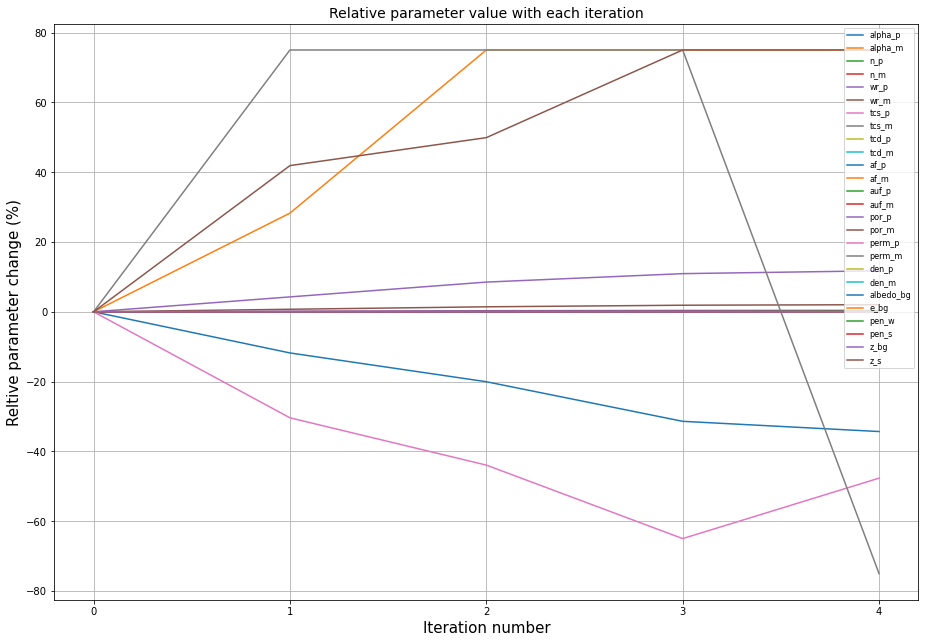

In [16]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_axes([0,0,1,1])

for i, value in enumerate(par_change.columns):
    ax.plot(par_change.iloc[:,i], label=f'{value}')
    

#ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.set_title(f'Relative parameter value with each iteration',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

### c. Objective function

In [17]:
no_iteration = np.arange(1,len(par_change.index),1)
no_iteration

array([1, 2, 3, 4])

In [18]:
# Residual files - importing the values from the file
# Residual files after each iteration
no_iteration = np.arange(1,len(par_change.index),1)
for i, value in enumerate(no_iteration):
    locals()[f'res_{value}'] = pd.read_csv(f'{directory_name}/{cf_name}.rei{value}', skiprows=2,delim_whitespace=True)

#res_best = pd.read_csv(f'{directory_name}/rk_model_glm_cf.res', skiprows=2,delim_whitespace=True)
#res_best
res_1.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,261.0233,270.150000,-9.126700,0.000554
1,stemp_0.04_1,temp,261.0067,269.311746,-8.305046,0.000554
2,stemp_0.04_2,temp,260.8549,268.485175,-7.630275,0.000554
3,stemp_0.04_3,temp,261.0327,267.660245,-6.627545,0.000554
4,stemp_0.04_4,temp,261.3470,266.750424,-5.403424,0.000554


#### Analyzing the residual weights:


In [19]:
res_1['Weight'].describe()

count    5110.000000
mean        0.000349
std         0.000206
min         0.000143
25%         0.000143
50%         0.000349
75%         0.000554
max         0.000554
Name: Weight, dtype: float64

In [20]:
res_1['Weight'].unique()

array([0.00055424, 0.0001429 ])

In [21]:
# Following the code from line 94 - file : res.py
def obj_fun(rei_df):
    """
    Function defined to calculate the objective function along with the residual values
    
    Input: rei_df - Residual dataframe
    
    
    """
    
    # Apply weighted residual and calculate phi contributions
    rei_df['Weighted_Residual'] = rei_df['Residual'] * rei_df['Weight']
    rei_df['Absolute_Residual'] = abs(rei_df['Residual'])
    rei_df['Weighted_Absolute_Residual'] = rei_df['Absolute_Residual'] * rei_df['Weight']
    
    # Calculate phi
    rei_df['Weighted_Sq_Residual'] = rei_df['Weighted_Residual']**2
    
    # Percentage contribution by each observation
    rei_df['Phi_Percent'] = rei_df['Weighted_Sq_Residual']/(rei_df['Weighted_Sq_Residual'].sum())*100
    
    return rei_df

In [22]:
# Finding the variation of residuals
for i, value in enumerate(no_iteration):
    locals()[f'res_phi_{value}'] = obj_fun(locals()[f'res_{value}'])
    
#res_phi_1 = obj_fun(res_1)
res_phi_1.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,261.0233,270.150000,-9.126700,0.000554,-0.005058,9.126700,0.005058,0.000026,0.123617
1,stemp_0.04_1,temp,261.0067,269.311746,-8.305046,0.000554,-0.004603,8.305046,0.004603,0.000021,0.102361
2,stemp_0.04_2,temp,260.8549,268.485175,-7.630275,0.000554,-0.004229,7.630275,0.004229,0.000018,0.086403
3,stemp_0.04_3,temp,261.0327,267.660245,-6.627545,0.000554,-0.003673,6.627545,0.003673,0.000013,0.065186
4,stemp_0.04_4,temp,261.3470,266.750424,-5.403424,0.000554,-0.002995,5.403424,0.002995,0.000009,0.043330


In [23]:
res_phi_1['Weighted_Sq_Residual'].mean()

4.050641474031027e-06

In [24]:
# Defining a dataframe with a objective function
# Changing the units by multiplying by 1e6

objfn_phi = pd.DataFrame(index=no_iteration,columns=['obj_func'])

for i, value in enumerate(no_iteration):
    objfn_phi.iloc[i,0] = locals()[f'res_phi_{i+1}']['Weighted_Sq_Residual'].mean()*1e7

objfn_phi.head()

,obj_func
1,40.506415
2,40.048435
3,39.763326
4,39.69589


In [25]:
#fig, ax = plt.subplots(figsize=(14, 6))

#plt.figure(figsize=(10, 6))
#ax.plot(objfn_phi['obj_func'])
#ax.set_title('Plotting objective function with each iteration ', fontsize=15)
#ax.set_ylabel('Objective function (*1e7)', fontsize=12)
#ax.set_xlabel('Iteration number', fontsize=12)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.grid()

The values were calculated using a formula. It not the same as the objective function calculated by the PEST program!

Comments:
    
* It shows here that the second iteration has the least objective function value

How to determine the parameter dataset and residual values with the best dataset?

#### Accessing the objective function with every iteration 

In [26]:
obj_iteration = pd.read_csv(f'{directory_name}/{cf_name}.iobj')
#obj_iteration.index = par_iteration['iteration']
obj_iteration.drop(axis=1, columns=['iteration'], inplace=True)
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.020960,0.020960,0,0.010480,0.010480
1,37,0.020699,0.020699,0,0.010425,0.010274
2,73,0.020465,0.020465,0,0.010390,0.010075
3,135,0.020319,0.020319,0,0.010375,0.009944
4,197,0.020285,0.020285,0,0.010384,0.009900


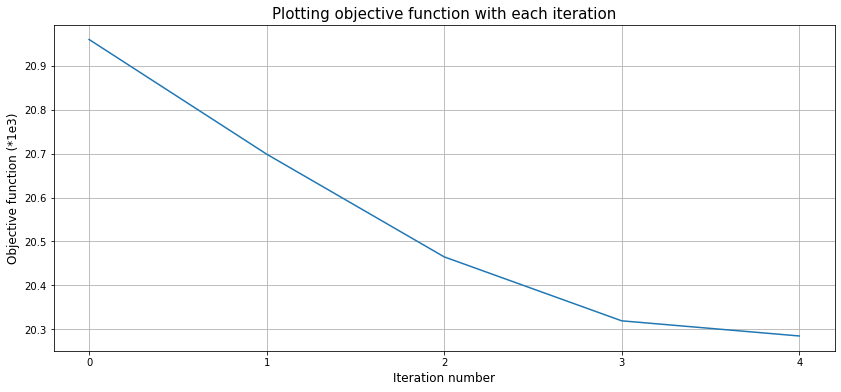

<Figure size 720x432 with 0 Axes>

In [27]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.figure(figsize=(10, 6))
ax.plot(obj_iteration['total_phi']*1e3)
ax.set_title('Plotting objective function with each iteration', fontsize=15)
ax.set_ylabel('Objective function (*1e3)', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

**Comments:**
- The objective function is reducing with each iteration.

### d. Residuals
1. First choose the iteration with the minimum objective function value.
2. Then plot the residual based on this iteration

In [28]:
obj_iteration['total_phi'].idxmin()
# The iteration with the minimum objective function

4

In [43]:
# Finding the index where we will be encountering the minimum objective function
itrno_best = obj_iteration['total_phi'].idxmin()

# Finding the corresponding residuals
res_best = locals()[f'res_{itrno_best}'].copy()

res_best.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,261.0233,270.150000,-9.126700,0.000554,-0.005058,9.126700,0.005058,0.000026,0.126141
1,stemp_0.04_1,temp,261.0067,269.354243,-8.347543,0.000554,-0.004627,8.347543,0.004627,0.000021,0.105523
2,stemp_0.04_2,temp,260.8549,268.546774,-7.691874,0.000554,-0.004263,7.691874,0.004263,0.000018,0.089597
3,stemp_0.04_3,temp,261.0327,267.724598,-6.691898,0.000554,-0.003709,6.691898,0.003709,0.000014,0.067815
4,stemp_0.04_4,temp,261.3470,266.807527,-5.460527,0.000554,-0.003026,5.460527,0.003026,0.000009,0.045154


In [44]:
temp_measured = res_best.iloc[:2555,2] # The 2nd column contains the measured values and we have only temperature values from the first 2555 values
mois_measured = res_best.iloc[2555:,2]

temp_sim = res_best.iloc[:2555,3] # The 3rd column contains the simulated values 
mois_sim = res_best.iloc[2555:,3]

temp_res = res_best.iloc[:2555,4] # The 4th column contains the residual values 
mois_res = res_best.iloc[2555:,4]

Text(0.5, 0, 'Days')

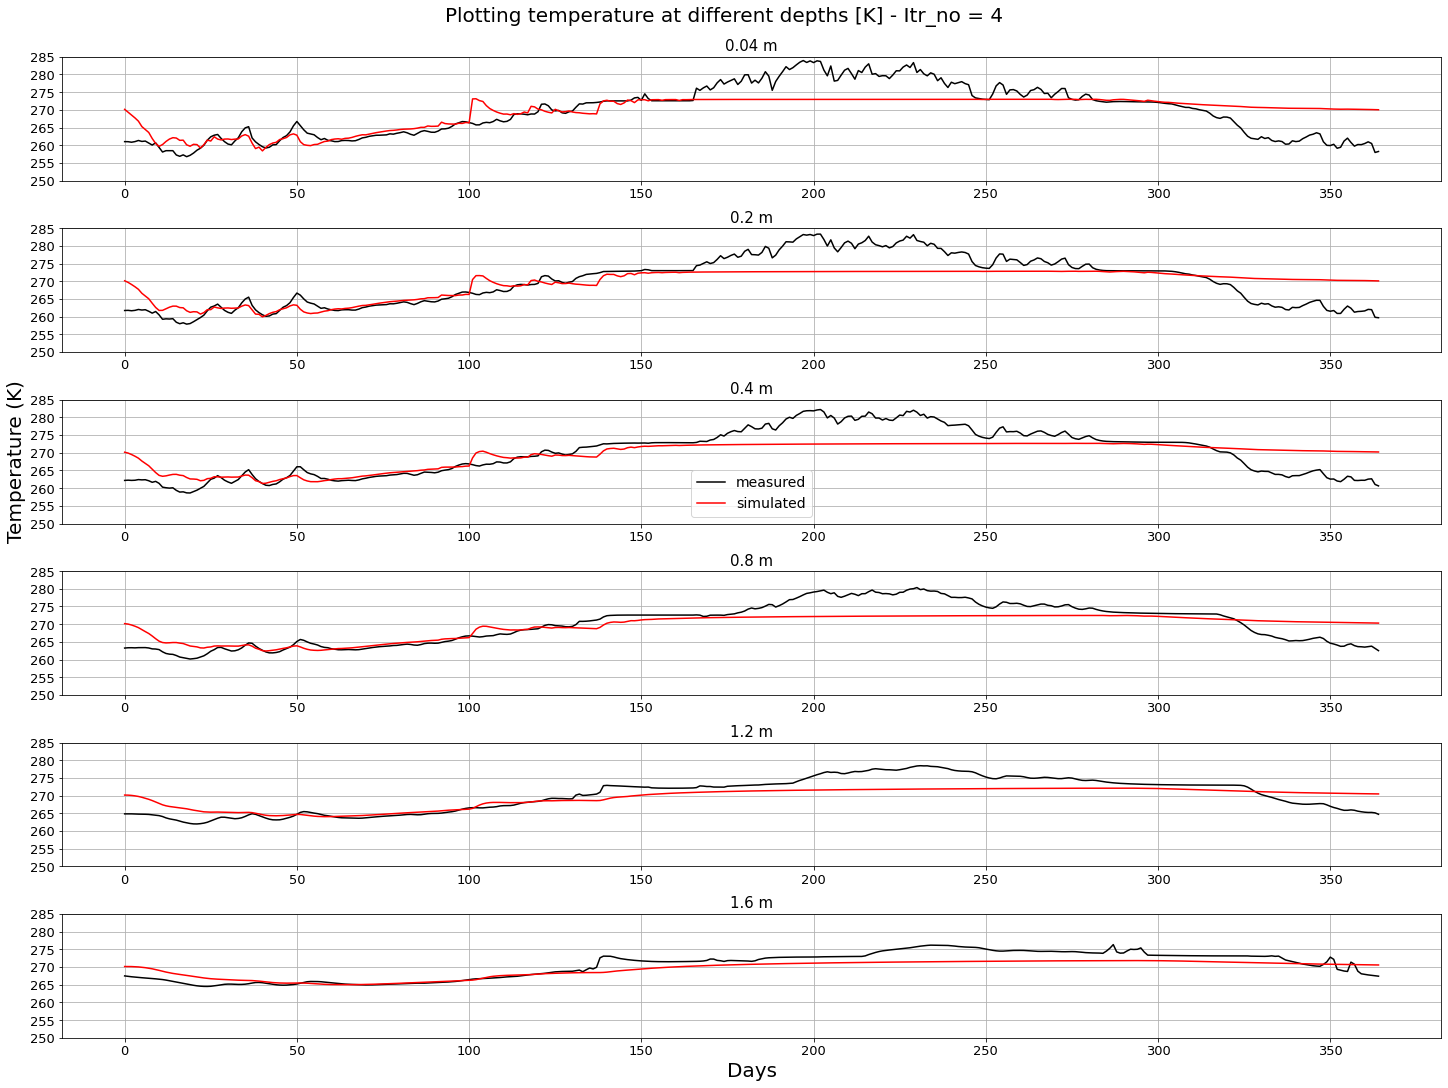

In [45]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+365].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

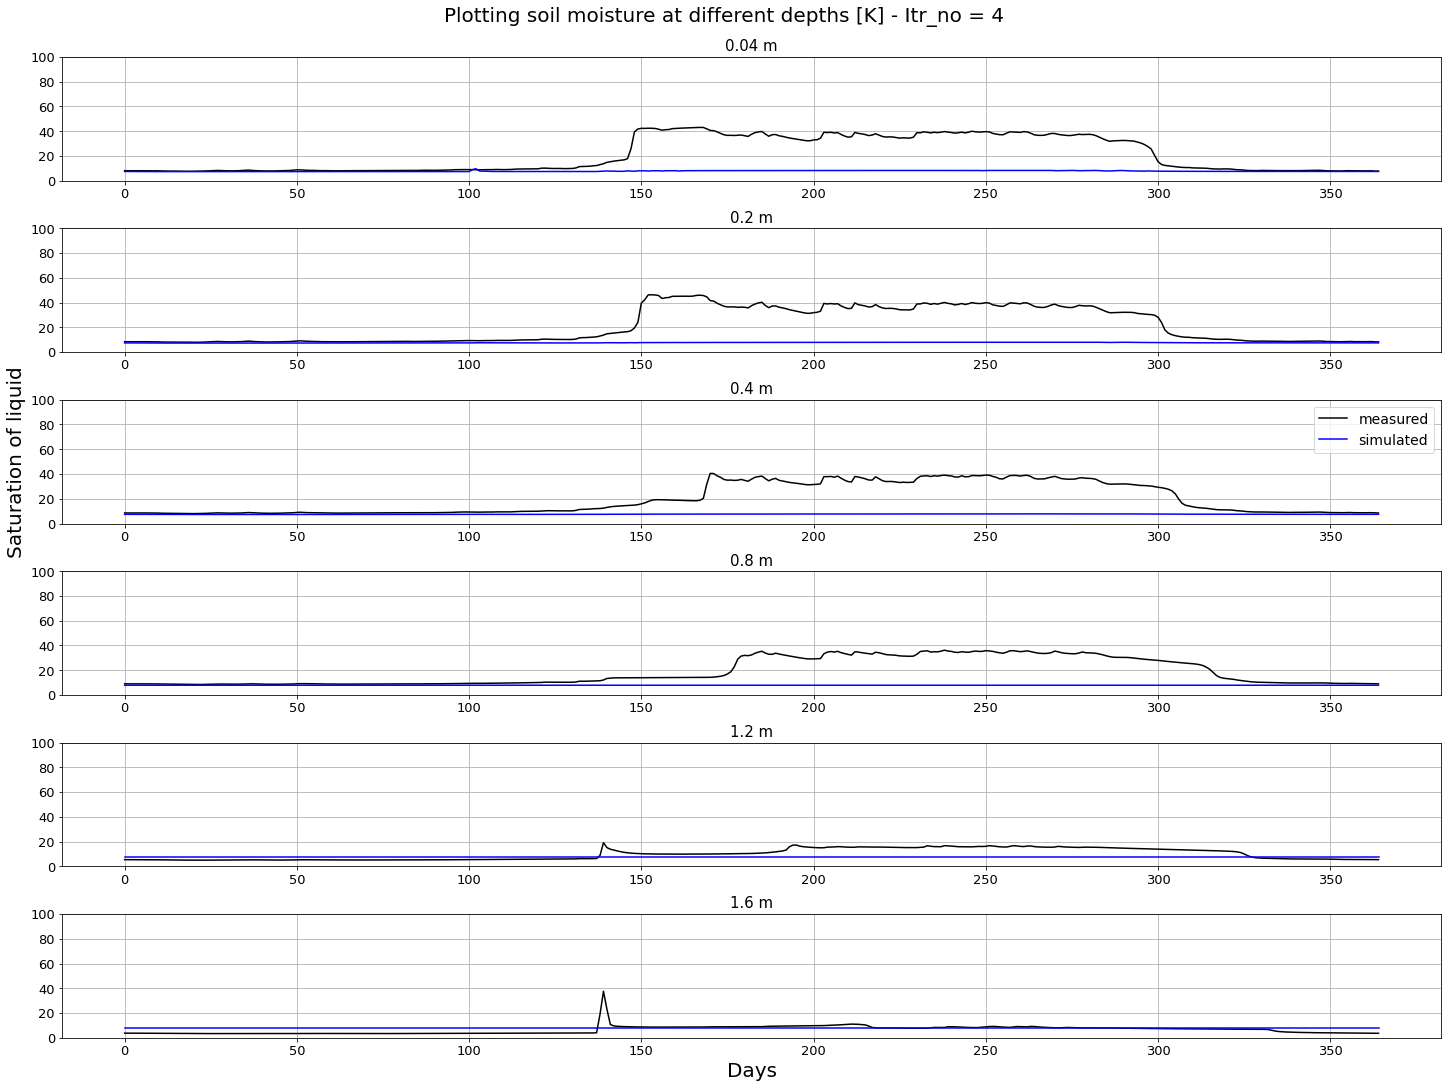

In [46]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+365].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. 

In [47]:
mois_measured[4519]

37.60354

<Figure size 720x432 with 0 Axes>

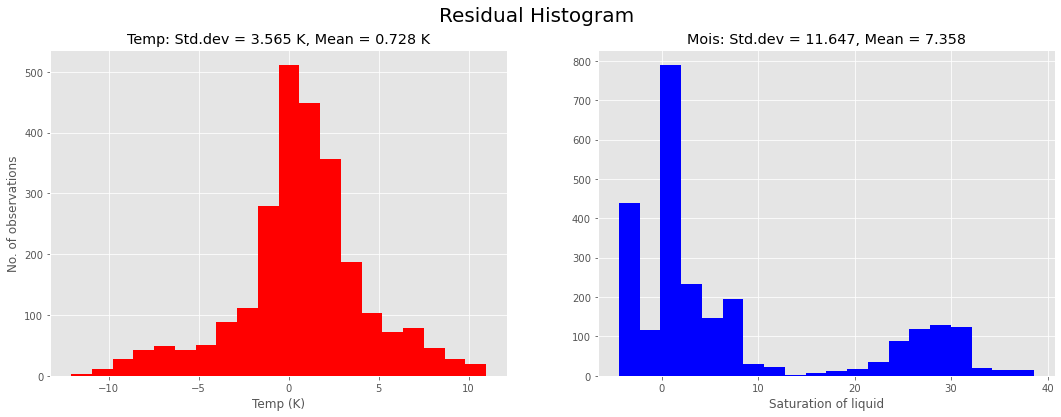

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [49]:
temp_res.describe()

count    2555.000000
mean        0.728137
std         3.564518
min       -12.096379
25%        -0.675468
50%         0.769521
75%         2.467142
max        10.975294
Name: Residual, dtype: float64

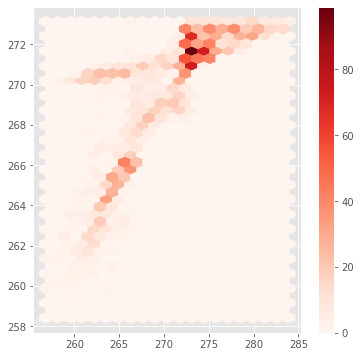

In [50]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

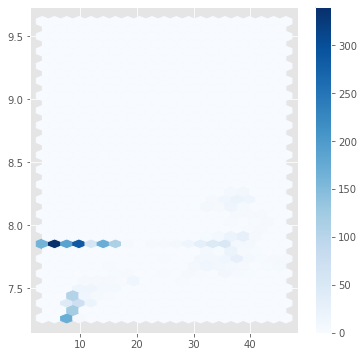

In [51]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

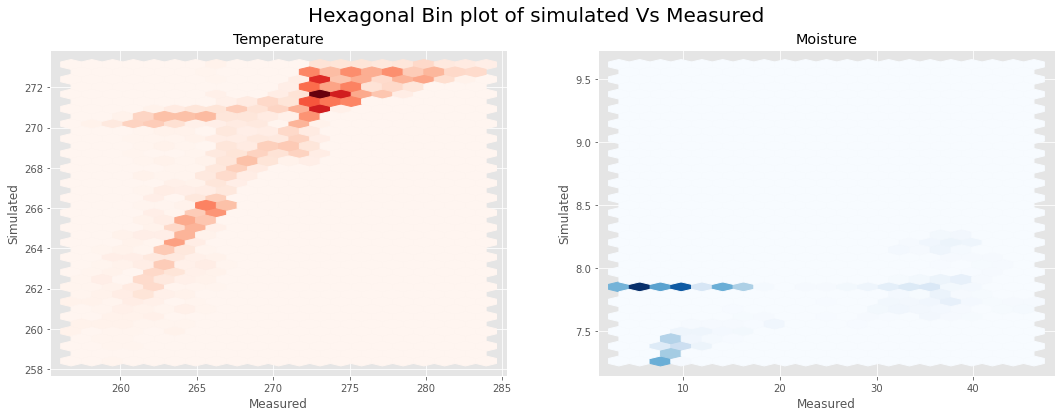

In [52]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

#### f. Relative contribution of temperature and moisture on the objective function

In [53]:
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.020960,0.020960,0,0.010480,0.010480
1,37,0.020699,0.020699,0,0.010425,0.010274
2,73,0.020465,0.020465,0,0.010390,0.010075
3,135,0.020319,0.020319,0,0.010375,0.009944
4,197,0.020285,0.020285,0,0.010384,0.009900


In [54]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

np.array(obj_itr_best[['temp','mois']])*1e6

array([10384.3 ,  9900.29])

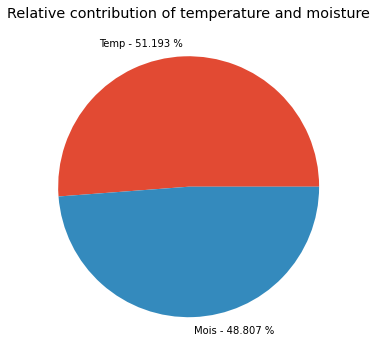

In [55]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

con_variables = np.array(obj_itr_best[['temp','mois']])/obj_itr_best['measurement_phi']*100

### To find the percentage contribution, we need subtract it with total_phi and multiply 

plt.figure(figsize=(6,6))
plt.title('Relative contribution of temperature and moisture')
mylabels=[f'Temp - {np.round(con_variables[0],3)} %',f'Mois - {np.round(con_variables[1],3)} %']
plt.pie(con_variables,labels=mylabels)
#plt.legend()
plt.show()
#plt.legend()

### How does the best parameters look like? Are they plausible? How do they compare with the other cases? Do we go for the case with optimal value or a case that shows more physical possibility?

In [56]:
itrno_best

4

### Exporting the values:

The values are mainly exported for the best iteration i.e. with the least objective function.

In [58]:
cf_name

'Case5_III_C_glm_cf_v1_rw'

#### 1. Parameters:

In [59]:
### Best parameters:
best_params = par_iteration.loc[itrno_best,:]
### Saving it as a csv file
best_params.to_csv(f'Final_comp_cases_data/best_params_{cf_name}.csv',sep=',')

#### 2. Residuals - Temperature and moisture

In [60]:
res_best.to_csv(f'Final_comp_cases_data/best_res_{cf_name}.csv',sep=',')

#### 3. Objective function

In [61]:
obj_iteration.to_csv(f'Final_comp_cases_data/obj_fn_{cf_name}.csv',sep=',')

#### 4. Parameter sensitivity - best

In [62]:
sen_best = sen_iteration.loc[itrno_best,:]
sen_best.to_csv(f'Final_comp_cases_data/best_sen_{cf_name}.csv',sep=',')

#### f. Identifibility tool - Identifiability is defined here as the capability of model calibration to constrain parameters used by a model.
- Go through the article and extract results later!

#### g. Plotting the covariance matrix for the variables